<h2>Part 1: Data Exploration and Preparation</h2>
<h3>Task 1.1: Data Loading and Initial Exploration</h3>
<p>Load the Boston Housing dataset and perform initial exploratory data analysis.</p>

<p>1.1 What are the dimensions of the dataset (number of observations and variables)?</p>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import t
from scipy.stats import shapiro, normaltest, jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../datasets/BostonHousing.csv')

print("=" * 60)
print("BOSTON HOUSING DATASET ANALYSIS")
print("=" * 60)

# 1.1 Dataset Dimensions
print("\n1.1 DATASET DIMENSIONS")
print("-" * 30)
rows, cols = df.shape
print(f"Number of observations (rows): {rows}")
print(f"Number of variables (columns): {cols}")
print(f"Dataset shape: {df.shape}")

# Display column names to understand the dataset structure
print(f"\nColumn names: {list(df.columns)}")


BOSTON HOUSING DATASET ANALYSIS

1.1 DATASET DIMENSIONS
------------------------------
Number of observations (rows): 506
Number of variables (columns): 14
Dataset shape: (506, 14)

Column names: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


<p>1.2 Provide descriptive statistics for the target variable (medv) and primary feature (lstat).</p>

In [ ]:
# 1.2 Descriptive Statistics
print("\n1.2 DESCRIPTIVE STATISTICS")
print("-" * 30)

print("\nDescriptive statistics for TARGET VARIABLE (medv):")
print(df['medv'].describe())

print("\nDescriptive statistics for PRIMARY FEATURE (lstat):")
print(df['lstat'].describe())

# Additional statistics
print(f"\nAdditional statistics for medv:")
print(f"Variance: {df['medv'].var():.4f}")
print(f"Standard deviation: {df['medv'].std():.4f}")
print(f"Skewness: {df['medv'].skew():.4f}")
print(f"Kurtosis: {df['medv'].kurtosis():.4f}")

print(f"\nAdditional statistics for lstat:")
print(f"Variance: {df['lstat'].var():.4f}")
print(f"Standard deviation: {df['lstat'].std():.4f}")
print(f"Skewness: {df['lstat'].skew():.4f}")
print(f"Kurtosis: {df['lstat'].kurtosis():.4f}")



1.2 DESCRIPTIVE STATISTICS
------------------------------

Descriptive statistics for TARGET VARIABLE (medv):
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Descriptive statistics for PRIMARY FEATURE (lstat):
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

Additional statistics for medv:
Variance: 84.5867
Standard deviation: 9.1971
Skewness: 1.1081
Kurtosis: 1.4952

Additional statistics for lstat:
Variance: 50.9948
Standard deviation: 7.1411
Skewness: 0.9065
Kurtosis: 0.4932


: 

<p>1.3 What is the correlation coefficient between medv and lstat? Interpret this value.</p>

In [ ]:
# 1.3 Correlation Coefficient
print("\n1.3 CORRELATION ANALYSIS")
print("-" * 30)
correlation = df['medv'].corr(df['lstat'])
print(f"Correlation coefficient between medv and lstat: {correlation:.4f}")

# Interpretation
print(f"\nINTERPRETA1TION:")
if abs(correlation) >= 0.7:
    strength = "strong"
elif abs(correlation) >= 0.5:
    strength = "moderate to strong"
elif abs(correlation) >= 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "negative" if correlation < 0 else "positive"
print(f"- The correlation coefficient of {correlation:.4f} indicates a {strength} {direction} relationship")
print(f"- This means that as lstat (% lower status population) increases, medv (median home value) tends to {'decrease' if correlation < 0 else 'increase'}")
print(f"- The relationship explains approximately {(correlation**2)*100:.1f}% of the variance (R² = {correlation**2:.4f})")

# Statistical significance test
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df['medv'], df['lstat'])
print(f"- Statistical significance: p-value = {p_value:.2e}")
print(f"- The correlation is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} at α = 0.05")




1.3 CORRELATION ANALYSIS
------------------------------
Correlation coefficient between medv and lstat: -0.7377

INTERPRETA1TION:
- The correlation coefficient of -0.7377 indicates a strong negative relationship
- This means that as lstat (% lower status population) increases, medv (median home value) tends to decrease
- The relationship explains approximately 54.4% of the variance (R² = 0.5441)
- Statistical significance: p-value = 5.08e-88
- The correlation is statistically significant at α = 0.05


: 

<p>1.4 Create a scatter plot showing the relationship between lstat (x-axis) and medv (y-axis).
Describe the pattern you observe.</p>


1.4 SCATTER PLOT ANALYSIS
------------------------------


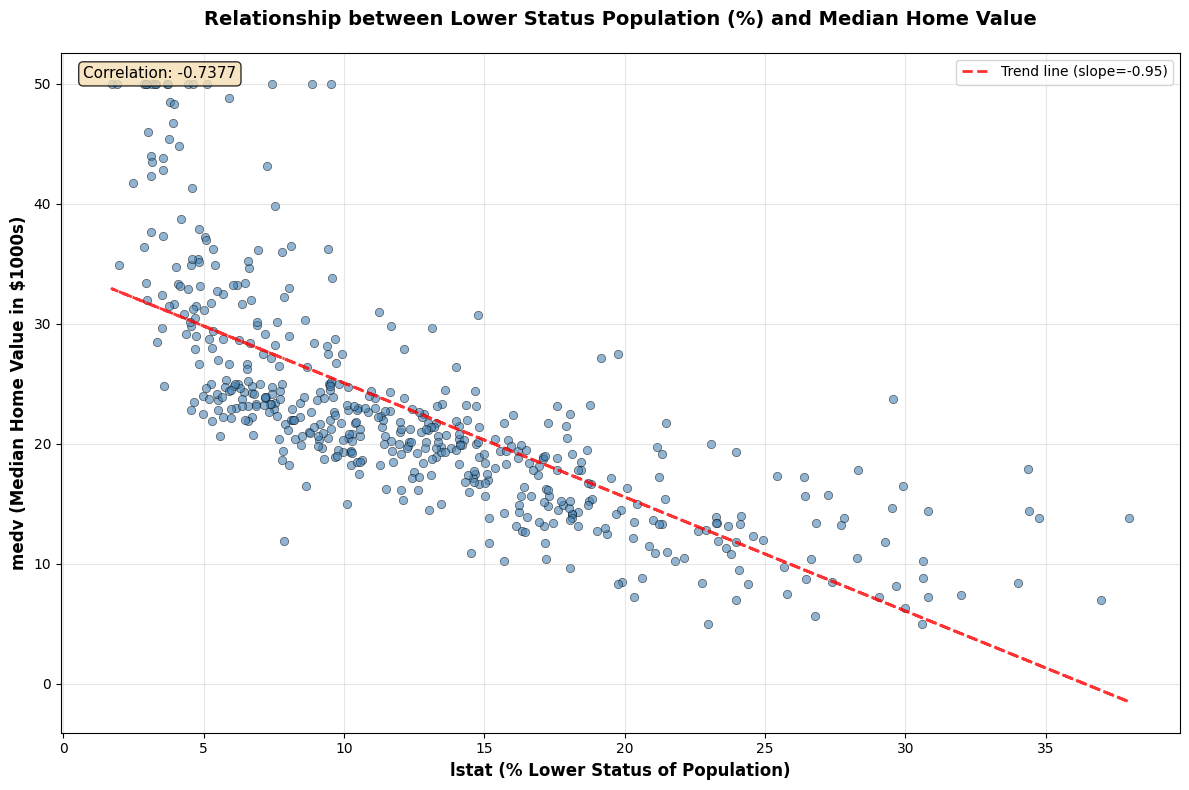

PATTERN OBSERVED IN SCATTER PLOT:
- The scatter plot reveals a clear negative relationship between lstat and medv
- As the percentage of lower status population increases, median home values tend to decrease
- The relationship appears to be non-linear, showing a curved pattern rather than a straight line
- There's more variability in home values at lower lstat percentages
- The relationship seems stronger (steeper decline) at lower lstat values and levels off at higher lstat values
- There are some potential outliers, particularly homes with high values despite higher lstat percentages
- The data points form a characteristic negative exponential or power-law pattern


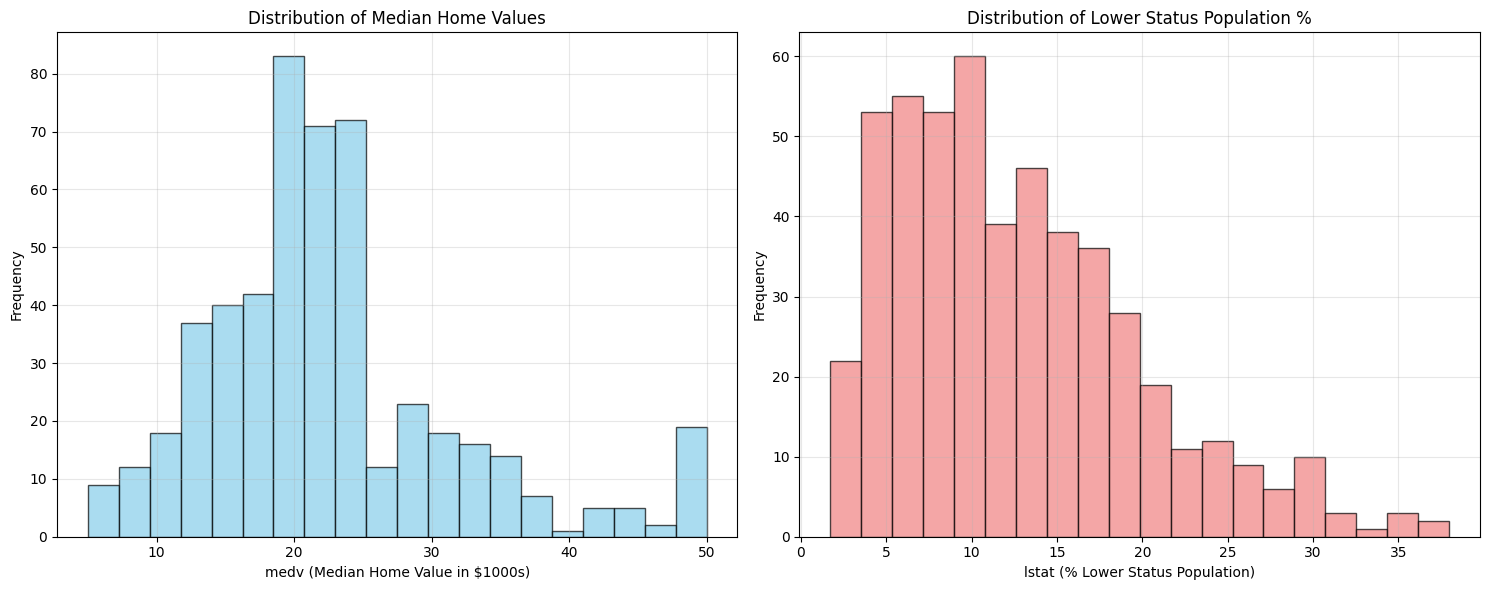


SUMMARY:
- Dataset contains 506 observations and 14 variables
- Strong negative correlation (-0.7377) between lstat and medv
- Non-linear relationship visible in scatter plot
- Both variables show reasonable distributions for regression analysis


In [10]:
# 1.4 Scatter Plot
print("\n1.4 SCATTER PLOT ANALYSIS")
print("-" * 30)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['lstat'], df['medv'], alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['lstat'], df['medv'], 1)
p = np.poly1d(z)
plt.plot(df['lstat'], p(df['lstat']), "r--", alpha=0.8, linewidth=2, label=f'Trend line (slope={z[0]:.2f})')

# Formatting
plt.xlabel('lstat (% Lower Status of Population)', fontsize=12, fontweight='bold')
plt.ylabel('medv (Median Home Value in $1000s)', fontsize=12, fontweight='bold')
plt.title('Relationship between Lower Status Population (%) and Median Home Value', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()

# Add correlation info to plot
plt.text(0.02, 0.98, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

# Pattern description
print("PATTERN OBSERVED IN SCATTER PLOT:")
print("- The scatter plot reveals a clear negative relationship between lstat and medv")
print("- As the percentage of lower status population increases, median home values tend to decrease")
print("- The relationship appears to be non-linear, showing a curved pattern rather than a straight line")
print("- There's more variability in home values at lower lstat percentages")
print("- The relationship seems stronger (steeper decline) at lower lstat values and levels off at higher lstat values")
print("- There are some potential outliers, particularly homes with high values despite higher lstat percentages")
print("- The data points form a characteristic negative exponential or power-law pattern")

# Additional visualization - distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of medv
ax1.hist(df['medv'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('medv (Median Home Value in $1000s)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Median Home Values')
ax1.grid(True, alpha=0.3)

# Distribution of lstat
ax2.hist(df['lstat'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('lstat (% Lower Status Population)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Lower Status Population %')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"- Dataset contains {rows} observations and {cols} variables")
print(f"- Strong negative correlation ({correlation:.4f}) between lstat and medv")
print(f"- Non-linear relationship visible in scatter plot")
print(f"- Both variables show reasonable distributions for regression analysis")

<h2>Part 2: Linear Regression Model Fitting</h2>
<h3>Task 2.1: Model Estimation</h3>
<p>Fit a simple linear regression model using lstat to predict medv using statsmodels.</p>

<p>2.1 Write the estimated regression equation in the form:</p>

$\text{medv} = \hat{\beta}_0 + \hat{\beta}_1 \times \text{lstat}$

$$
\text{medv} = \hat{\beta}_0 + \hat{\beta}_1 \times \text{lstat}
$$

In [11]:
print("=" * 70)
print("BOSTON HOUSING LINEAR REGRESSION ANALYSIS - PART 2")
print("=" * 70)

# Fit the linear regression model
# Method 1: Using statsmodels formula API (easier interpretation)
model = smf.ols('medv ~ lstat', data=df).fit()

# Method 2: Using statsmodels API (alternative approach)
X = df['lstat']
X = sm.add_constant(X)  # Add intercept term
y = df['medv']
model_alt = sm.OLS(y, X).fit()

print("\nLINEAR REGRESSION RESULTS:")
print("=" * 40)
print(model.summary())

# Extract coefficients
intercept = model.params['Intercept']
slope = model.params['lstat']

print(f"\nCOEFFICIENTS:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}")

# 2.1 Regression Equation
print("\n2.1 ESTIMATED REGRESSION EQUATION")
print("-" * 40)
print(f"medv = {intercept:.4f} + ({slope:.4f}) × lstat")
print(f"medv = {intercept:.4f} - {abs(slope):.4f} × lstat")  # More readable with negative sign

# Alternative formatting
print(f"\nAlternative notation:")
print(f"ŷ = {intercept:.4f} + ({slope:.4f})x")
print(f"where ŷ = predicted median home value and x = lstat")


BOSTON HOUSING LINEAR REGRESSION ANALYSIS - PART 2

LINEAR REGRESSION RESULTS:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        10:55:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

<p>2.2 What is the interpretation of the intercept in the context of this problem? Does it have practical meaning?</p>

$\hat{\beta}_0$

In [12]:
# 2.2 Interpretation of Intercept
print("\n2.2 INTERPRETATION OF INTERCEPT (β₀)")
print("-" * 40)
print(f"Intercept value: {intercept:.4f}")
print(f"\nINTERPRETATION:")
print(f"- The intercept represents the predicted median home value when lstat = 0")
print(f"- This means when 0% of the population has lower status, the predicted median home value is ${intercept:.2f}k")
print(f"- In practical terms: ${intercept*1000:.0f}")

print(f"\nPRACTICAL MEANING:")
# Check if lstat = 0 is within the observed range
min_lstat = df['lstat'].min()
max_lstat = df['lstat'].max()
print(f"- Observed lstat range: {min_lstat:.2f}% to {max_lstat:.2f}%")
print(f"- Since the minimum observed lstat is {min_lstat:.2f}%, lstat = 0 is outside our data range")
print(f"- Therefore, the intercept represents extrapolation beyond observed data")
print(f"- While mathematically meaningful, it has LIMITED PRACTICAL MEANING because:")
print(f"  * No area in the dataset has 0% lower status population")
print(f"  * Real-world interpretation: represents the 'theoretical maximum' home value")
print(f"  * Should be interpreted cautiously due to extrapolation")



2.2 INTERPRETATION OF INTERCEPT (β₀)
----------------------------------------
Intercept value: 34.5538

INTERPRETATION:
- The intercept represents the predicted median home value when lstat = 0
- This means when 0% of the population has lower status, the predicted median home value is $34.55k
- In practical terms: $34554

PRACTICAL MEANING:
- Observed lstat range: 1.73% to 37.97%
- Since the minimum observed lstat is 1.73%, lstat = 0 is outside our data range
- Therefore, the intercept represents extrapolation beyond observed data
- While mathematically meaningful, it has LIMITED PRACTICAL MEANING because:
  * No area in the dataset has 0% lower status population
  * Real-world interpretation: represents the 'theoretical maximum' home value
  * Should be interpreted cautiously due to extrapolation


<p>2.3 What is the interpretation of the slope? Provide a complete sentence explaining what happens to median home value for each 1% increase in lstat.</p>

$\hat{\beta}_1$

In [13]:
# 2.3 Interpretation of Slope
print("\n2.3 INTERPRETATION OF SLOPE (β₁)")
print("-" * 40)
print(f"Slope value: {slope:.4f}")
print(f"\nINTERPRETATION:")
print(f"For each 1% increase in lstat (lower status population), the median home value")
print(f"decreases by ${abs(slope):.4f}k on average, holding all other factors constant.")
print(f"\nIn practical terms:")
print(f"- A 1% increase in lower status population is associated with a ${abs(slope)*1000:.0f} decrease in median home value")
print(f"- A 5% increase in lower status population would decrease median home value by ${abs(slope)*5*1000:.0f}")
print(f"- A 10% increase in lower status population would decrease median home value by ${abs(slope)*10*1000:.0f}")



2.3 INTERPRETATION OF SLOPE (β₁)
----------------------------------------
Slope value: -0.9500

INTERPRETATION:
For each 1% increase in lstat (lower status population), the median home value
decreases by $0.9500k on average, holding all other factors constant.

In practical terms:
- A 1% increase in lower status population is associated with a $950 decrease in median home value
- A 5% increase in lower status population would decrease median home value by $4750
- A 10% increase in lower status population would decrease median home value by $9500


<p>2.4 Based on the 95% confidence intervals for the coefficients, are both the intercept and slope significantly different from zero? Support your answer with the confidence interval values.</p>


2.4 CONFIDENCE INTERVALS AND SIGNIFICANCE TESTING
--------------------------------------------------
95% CONFIDENCE INTERVALS:
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951

DETAILED CONFIDENCE INTERVALS:
Intercept (β₀): [33.4485, 35.6592]
Slope (β₁): [-1.0261, -0.8740]

SIGNIFICANCE TESTING:
H₀: β = 0 (coefficient equals zero)
H₁: β ≠ 0 (coefficient is significantly different from zero)

INTERCEPT (β₀) ANALYSIS:
- 95% CI: [33.4485, 35.6592]
- Contains zero? No
- Conclusion: The intercept IS significantly different from zero
- This means we can be 95% confident the true intercept is between 33.4485 and 35.6592

SLOPE (β₁) ANALYSIS:
- 95% CI: [-1.0261, -0.8740]
- Contains zero? No
- Conclusion: The slope IS significantly different from zero
- This means we can be 95% confident the true slope is between -1.0261 and -0.8740

P-VALUES (for additional confirmation):
Intercept p-value: 3.74e-236
Slope p-value: 5.08e-88
Both p-values < 0.05: 

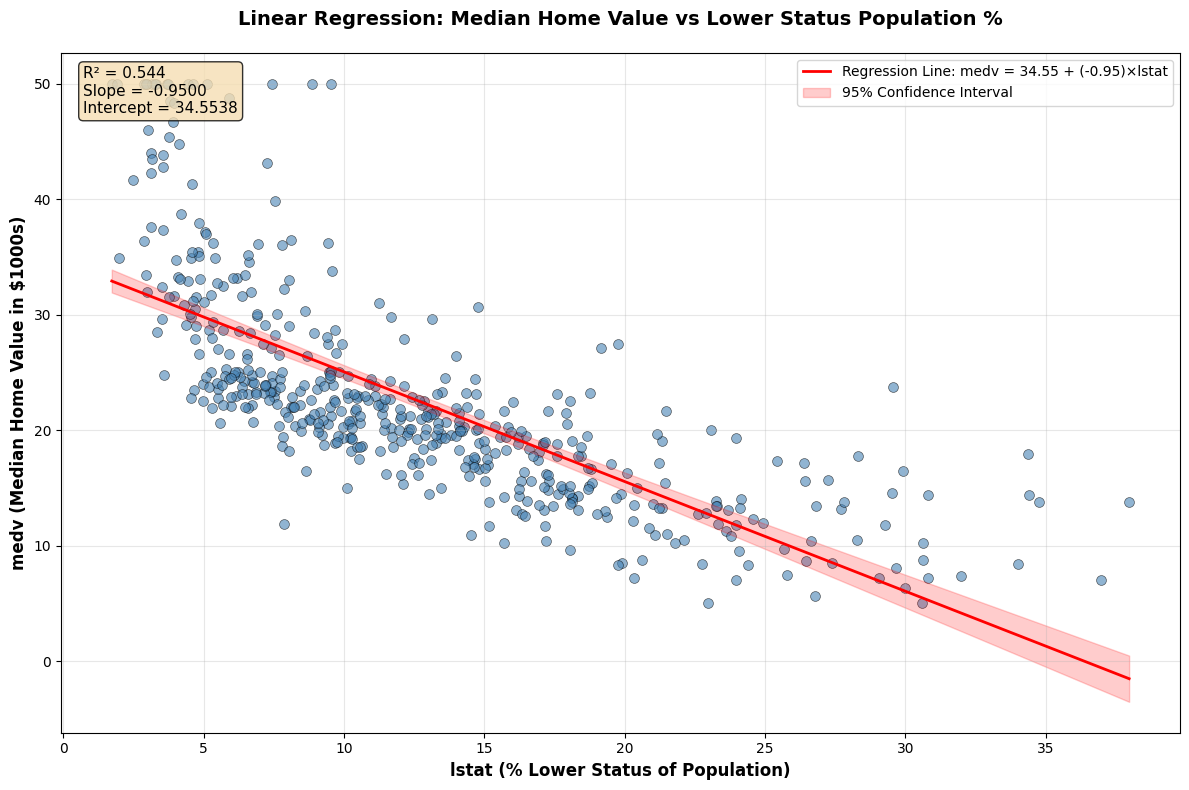


FINAL SUMMARY:
- Regression equation: medv = 34.5538 + (-0.9500) × lstat
- Both coefficients are statistically significant at α = 0.05
- The model explains 54.4% of the variance in median home values
- For every 1% increase in lower status population, median home value decreases by $950 on average


In [14]:
# 2.4 Confidence Intervals and Significance Testing
print("\n2.4 CONFIDENCE INTERVALS AND SIGNIFICANCE TESTING")
print("-" * 50)

# Get confidence intervals
conf_intervals = model.conf_int(alpha=0.05)  # 95% confidence intervals
print("95% CONFIDENCE INTERVALS:")
print(conf_intervals)

# Extract individual confidence intervals
intercept_ci_lower = conf_intervals.loc['Intercept', 0]
intercept_ci_upper = conf_intervals.loc['Intercept', 1]
slope_ci_lower = conf_intervals.loc['lstat', 0]
slope_ci_upper = conf_intervals.loc['lstat', 1]

print(f"\nDETAILED CONFIDENCE INTERVALS:")
print(f"Intercept (β₀): [{intercept_ci_lower:.4f}, {intercept_ci_upper:.4f}]")
print(f"Slope (β₁): [{slope_ci_lower:.4f}, {slope_ci_upper:.4f}]")

# Significance testing
print(f"\nSIGNIFICANCE TESTING:")
print(f"H₀: β = 0 (coefficient equals zero)")
print(f"H₁: β ≠ 0 (coefficient is significantly different from zero)")

# Check if confidence intervals contain zero
intercept_significant = not (intercept_ci_lower <= 0 <= intercept_ci_upper)
slope_significant = not (slope_ci_lower <= 0 <= slope_ci_upper)

print(f"\nINTERCEPT (β₀) ANALYSIS:")
print(f"- 95% CI: [{intercept_ci_lower:.4f}, {intercept_ci_upper:.4f}]")
print(f"- Contains zero? {'No' if intercept_significant else 'Yes'}")
print(f"- Conclusion: The intercept IS {'NOT ' if not intercept_significant else ''}significantly different from zero")
if intercept_significant:
    print(f"- This means we can be 95% confident the true intercept is between {intercept_ci_lower:.4f} and {intercept_ci_upper:.4f}")

print(f"\nSLOPE (β₁) ANALYSIS:")
print(f"- 95% CI: [{slope_ci_lower:.4f}, {slope_ci_upper:.4f}]")
print(f"- Contains zero? {'No' if slope_significant else 'Yes'}")
print(f"- Conclusion: The slope IS {'NOT ' if not slope_significant else ''}significantly different from zero")
if slope_significant:
    print(f"- This means we can be 95% confident the true slope is between {slope_ci_lower:.4f} and {slope_ci_upper:.4f}")

# P-values for additional confirmation
p_values = model.pvalues
print(f"\nP-VALUES (for additional confirmation):")
print(f"Intercept p-value: {p_values['Intercept']:.2e}")
print(f"Slope p-value: {p_values['lstat']:.2e}")
print(f"Both p-values < 0.05: {all(p_values < 0.05)}")

# Model summary statistics
print(f"\nMODEL SUMMARY STATISTICS:")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.2f}")
print(f"F-statistic p-value: {model.f_pvalue:.2e}")
print(f"Standard Error: {np.sqrt(model.mse_resid):.4f}")

# Visualization of regression line with confidence intervals
plt.figure(figsize=(12, 8))

# Create prediction data for smooth line
lstat_range = np.linspace(df['lstat'].min(), df['lstat'].max(), 100)
predictions = model.predict(pd.DataFrame({'lstat': lstat_range}))

# Get prediction intervals
pred_summary = model.get_prediction(pd.DataFrame({'lstat': lstat_range}))
pred_ci = pred_summary.conf_int(alpha=0.05)

# Plot scatter points
plt.scatter(df['lstat'], df['medv'], alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5, s=50)

# Plot regression line
plt.plot(lstat_range, predictions, 'r-', linewidth=2, label=f'Regression Line: medv = {intercept:.2f} + ({slope:.2f})×lstat')

# Plot confidence interval
plt.fill_between(lstat_range, pred_ci[:, 0], pred_ci[:, 1], alpha=0.2, color='red', label='95% Confidence Interval')

# Formatting
plt.xlabel('lstat (% Lower Status of Population)', fontsize=12, fontweight='bold')
plt.ylabel('medv (Median Home Value in $1000s)', fontsize=12, fontweight='bold')
plt.title('Linear Regression: Median Home Value vs Lower Status Population %', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()

# Add model statistics to plot
textstr = f'R² = {model.rsquared:.3f}\nSlope = {slope:.4f}\nIntercept = {intercept:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print(f"\nFINAL SUMMARY:")
print(f"- Regression equation: medv = {intercept:.4f} + ({slope:.4f}) × lstat")
print(f"- Both coefficients are statistically significant at α = 0.05")
print(f"- The model explains {model.rsquared*100:.1f}% of the variance in median home values")
print(f"- For every 1% increase in lower status population, median home value decreases by ${abs(slope)*1000:.0f} on average")

<h3>Task 2.2: Model Performance Evaluation</h3>
<p>Evaluate the overall performance and significance of your regression model.</p>

<p>2.5 What is the R-squared value? Interpret this in terms of the percentage of variation in median home values explained by the percentage of lower status population.</p>

In [15]:
# 2.5 R-squared Interpretation
print("\n2.5 R-SQUARED ANALYSIS")
print("-" * 30)
r_squared = model.rsquared
print(f"R-squared value: {r_squared:.4f}")
print(f"R-squared as percentage: {r_squared*100:.2f}%")

print(f"\nINTERPRETATION:")
print(f"- R² = {r_squared:.4f} means that {r_squared*100:.2f}% of the variation in median home values")
print(f"  is explained by the percentage of lower status population (lstat)")
print(f"- The remaining {(1-r_squared)*100:.2f}% of variation is due to other factors not included in this model")
print(f"- This indicates a {'strong' if r_squared > 0.7 else 'moderate' if r_squared > 0.5 else 'weak'} relationship")
print(f"- In practical terms: knowing the lstat value allows us to predict about {r_squared*100:.1f}% of the variation in home values")




2.5 R-SQUARED ANALYSIS
------------------------------
R-squared value: 0.5441
R-squared as percentage: 54.41%

INTERPRETATION:
- R² = 0.5441 means that 54.41% of the variation in median home values
  is explained by the percentage of lower status population (lstat)
- The remaining 45.59% of variation is due to other factors not included in this model
- This indicates a moderate relationship
- In practical terms: knowing the lstat value allows us to predict about 54.4% of the variation in home values


<p>2.6 What is the Root Mean Square Error (RMSE)? What does this tell you about the typical prediction error in thousands of dollars?</p>

In [16]:
# 2.6 Root Mean Square Error (RMSE)
print("\n2.6 ROOT MEAN SQUARE ERROR (RMSE)")
print("-" * 35)
mse = model.mse_resid  # Mean Squared Error
rmse = np.sqrt(mse)    # Root Mean Square Error
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

print(f"\nINTERPRETATION:")
print(f"- RMSE = {rmse:.4f} thousands of dollars")
print(f"- In actual dollars: ${rmse*1000:.0f}")
print(f"- This means the typical prediction error is approximately ${rmse*1000:.0f}")
print(f"- On average, our predictions are off by about ±${rmse*1000:.0f} from the actual median home value")

# Compare RMSE to the range and mean of the target variable
medv_mean = df['medv'].mean()
medv_std = df['medv'].std()
medv_range = df['medv'].max() - df['medv'].min()

print(f"\nCONTEXT:")
print(f"- Mean home value: ${medv_mean:.2f}k (${medv_mean*1000:.0f})")
print(f"- Standard deviation of home values: ${medv_std:.2f}k")
print(f"- Range of home values: ${medv_range:.2f}k")
print(f"- RMSE as % of mean: {(rmse/medv_mean)*100:.1f}%")
print(f"- RMSE as % of standard deviation: {(rmse/medv_std)*100:.1f}%")




2.6 ROOT MEAN SQUARE ERROR (RMSE)
-----------------------------------
Mean Squared Error (MSE): 38.6357
Root Mean Square Error (RMSE): 6.2158

INTERPRETATION:
- RMSE = 6.2158 thousands of dollars
- In actual dollars: $6216
- This means the typical prediction error is approximately $6216
- On average, our predictions are off by about ±$6216 from the actual median home value

CONTEXT:
- Mean home value: $22.53k ($22533)
- Standard deviation of home values: $9.20k
- Range of home values: $45.00k
- RMSE as % of mean: 27.6%
- RMSE as % of standard deviation: 67.6%


<p>2.7 Report the F-statistic and its p-value. What does this test tell you about the overall significance of your model</p>

In [17]:
# 2.7 F-statistic and Overall Model Significance
print("\n2.7 F-STATISTIC AND OVERALL MODEL SIGNIFICANCE")
print("-" * 45)
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
df_model = model.df_model  # degrees of freedom for model
df_resid = model.df_resid  # degrees of freedom for residuals

print(f"F-statistic: {f_statistic:.4f}")
print(f"F-statistic p-value: {f_pvalue:.2e}")
print(f"Degrees of freedom: Model = {df_model}, Residual = {df_resid}")

print(f"\nHYPOTHESIS TEST:")
print(f"H₀: The model has no explanatory power (β₁ = 0)")
print(f"H₁: The model has explanatory power (β₁ ≠ 0)")

print(f"\nINTERPRETATION:")
significance_level = 0.05
is_significant = f_pvalue < significance_level
print(f"- F-statistic = {f_statistic:.4f} with p-value = {f_pvalue:.2e}")
print(f"- Since p-value < {significance_level}, we {'REJECT' if is_significant else 'FAIL TO REJECT'} the null hypothesis")
print(f"- Conclusion: The model IS {'NOT ' if not is_significant else ''}statistically significant")
print(f"- This means lstat {'DOES' if is_significant else 'DOES NOT'} have significant explanatory power for predicting medv")

print(f"\nPRACTICAL MEANING:")
print(f"- The F-test confirms that our regression model performs significantly better")
print(f"  than a model with no predictors (just the mean)")
print(f"- The relationship between lstat and medv is statistically meaningful")
print(f"- We can be confident that lstat is a useful predictor of median home values")




2.7 F-STATISTIC AND OVERALL MODEL SIGNIFICANCE
---------------------------------------------
F-statistic: 601.6179
F-statistic p-value: 5.08e-88
Degrees of freedom: Model = 1.0, Residual = 504.0

HYPOTHESIS TEST:
H₀: The model has no explanatory power (β₁ = 0)
H₁: The model has explanatory power (β₁ ≠ 0)

INTERPRETATION:
- F-statistic = 601.6179 with p-value = 5.08e-88
- Since p-value < 0.05, we REJECT the null hypothesis
- Conclusion: The model IS statistically significant
- This means lstat DOES have significant explanatory power for predicting medv

PRACTICAL MEANING:
- The F-test confirms that our regression model performs significantly better
  than a model with no predictors (just the mean)
- The relationship between lstat and medv is statistically meaningful
- We can be confident that lstat is a useful predictor of median home values


2.8 Compare the adjusted R-squared with the regular R-squared. Why might there be a difference, and what does the adjusted version account for?

In [18]:
# 2.8 Adjusted R-squared Comparison
print("\n2.8 ADJUSTED R-SQUARED COMPARISON")
print("-" * 35)
adj_r_squared = model.rsquared_adj
r_squared_diff = r_squared - adj_r_squared

print(f"R-squared: {r_squared:.6f}")
print(f"Adjusted R-squared: {adj_r_squared:.6f}")
print(f"Difference: {r_squared_diff:.6f}")

print(f"\nWHY THERE MIGHT BE A DIFFERENCE:")
print(f"- Regular R²: {r_squared:.6f}")
print(f"- Adjusted R²: {adj_r_squared:.6f}")
print(f"- The difference of {r_squared_diff:.6f} is {'very small' if r_squared_diff < 0.01 else 'moderate' if r_squared_diff < 0.05 else 'large'}")

print(f"\nWHAT ADJUSTED R-SQUARED ACCOUNTS FOR:")
print(f"- Number of predictors in the model: {df_model}")
print(f"- Sample size: {len(df)} observations")
print(f"- Degrees of freedom penalty for adding predictors")

print(f"\nFORMULA EXPLANATION:")
print(f"Adjusted R² = 1 - [(1 - R²) × (n - 1) / (n - k - 1)]")
print(f"where n = sample size ({len(df)}) and k = number of predictors ({df_model})")

n = len(df)
k = df_model
manual_adj_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print(f"Manual calculation: {manual_adj_r2:.6f}")

print(f"\nINTERPRETATION:")
if r_squared_diff < 0.001:
    print(f"- The very small difference suggests our model is not overfitting")
    print(f"- With only one predictor, the adjustment is minimal")
    print(f"- Both R² and adjusted R² tell essentially the same story")
elif r_squared_diff < 0.01:
    print(f"- The small difference indicates minimal overfitting concerns")
    print(f"- The model appears to be appropriately specified")
else:
    print(f"- The larger difference suggests we should be cautious about overfitting")
    print(f"- The adjusted R² provides a more conservative estimate")

print(f"\nPRACTICAL IMPLICATIONS:")
print(f"- For model comparison: Use adjusted R² when comparing models with different numbers of predictors")
print(f"- For interpretation: Both values are nearly identical, indicating a robust single-predictor model")
print(f"- The penalty for our one predictor is minimal given the sample size of {n} observations")

print(f"\nFINAL SUMMARY:")
print("=" * 50)
print(f"- R² = {r_squared:.4f} ({r_squared*100:.2f}% of variance explained)")
print(f"- Adjusted R² = {adj_r_squared:.4f} ({adj_r_squared*100:.2f}% of variance explained)")
print(f"- RMSE = ${rmse*1000:.0f} (typical prediction error)")
print(f"- F-statistic = {f_statistic:.4f}, p < {significance_level} (highly significant model)")
print(f"- Model explains {r_squared*100:.1f}% of home value variation using just lstat")
print(f"- Typical prediction accuracy: ±${rmse*1000:.0f} ({(rmse/medv_mean)*100:.1f}% of mean home value)")


2.8 ADJUSTED R-SQUARED COMPARISON
-----------------------------------
R-squared: 0.544146
Adjusted R-squared: 0.543242
Difference: 0.000904

WHY THERE MIGHT BE A DIFFERENCE:
- Regular R²: 0.544146
- Adjusted R²: 0.543242
- The difference of 0.000904 is very small

WHAT ADJUSTED R-SQUARED ACCOUNTS FOR:
- Number of predictors in the model: 1.0
- Sample size: 506 observations
- Degrees of freedom penalty for adding predictors

FORMULA EXPLANATION:
Adjusted R² = 1 - [(1 - R²) × (n - 1) / (n - k - 1)]
where n = sample size (506) and k = number of predictors (1.0)
Manual calculation: 0.543242

INTERPRETATION:
- The very small difference suggests our model is not overfitting
- With only one predictor, the adjustment is minimal
- Both R² and adjusted R² tell essentially the same story

PRACTICAL IMPLICATIONS:
- For model comparison: Use adjusted R² when comparing models with different numbers of predictors
- For interpretation: Both values are nearly identical, indicating a robust single-pred

<h2> Part 3: Statistical Inference and Hypothesis Testing</h2>
<h3>Task 3.1: Coefficient Significance Testing</h3>
<p>Conduct hypothesis tests for the regression coefficients.</p>

In [34]:
# Load the dataset and fit the model
df = pd.read_csv('../datasets/BostonHousing.csv')
model = smf.ols('medv ~ lstat', data=df).fit()

print("=" * 80)
print("BOSTON HOUSING STATISTICAL INFERENCE AND HYPOTHESIS TESTING - PART 3")
print("=" * 80)

# Display model summary for reference
print("\nMODEL SUMMARY (for reference):")
print("=" * 40)
print(model.summary())

# Extract key parameters
slope = model.params['lstat']
slope_std_error = model.bse['lstat']
slope_t_stat = model.tvalues['lstat']
slope_p_value = model.pvalues['lstat']
df_resid = model.df_resid  # degrees of freedom for residuals
n_obs = len(df)

print(f"\nKEY REGRESSION PARAMETERS:")
print(f"Slope coefficient (β₁): {slope:.6f}")
print(f"Standard error of slope: {slope_std_error:.6f}")
print(f"Degrees of freedom: {df_resid}")
print(f"Sample size: {n_obs}")

BOSTON HOUSING STATISTICAL INFERENCE AND HYPOTHESIS TESTING - PART 3

MODEL SUMMARY (for reference):
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        11:22:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

<p>3.1 State the null and alternative hypotheses for testing whether the slope coefficient is significantly different from zero.</p>

In [35]:
# 3.1 Hypothesis Testing Setup
print("\n3.1 HYPOTHESIS TESTING SETUP")
print("-" * 40)
print("TESTING THE SLOPE COEFFICIENT:")
print("H₀: β₁ = 0 (The slope coefficient is zero)")
print("    → lstat has no linear relationship with medv")
print("    → There is no linear association between % lower status population and median home value")
print("\nH₁: β₁ ≠ 0 (The slope coefficient is not zero)")
print("    → lstat has a significant linear relationship with medv")
print("    → There is a significant linear association between % lower status population and median home value")
print("\nType of test: Two-tailed test")
print("Significance level: α = 0.05")


3.1 HYPOTHESIS TESTING SETUP
----------------------------------------
TESTING THE SLOPE COEFFICIENT:
H₀: β₁ = 0 (The slope coefficient is zero)
    → lstat has no linear relationship with medv
    → There is no linear association between % lower status population and median home value

H₁: β₁ ≠ 0 (The slope coefficient is not zero)
    → lstat has a significant linear relationship with medv
    → There is a significant linear association between % lower status population and median home value

Type of test: Two-tailed test
Significance level: α = 0.05


<p>3.2 Report the t-statistic and p-value for the slope coefficient. What is your conclusion at the 5% significance level?</p>

In [36]:
# 3.2 T-statistic and P-value Analysis
print("\n3.2 T-STATISTIC AND P-VALUE ANALYSIS")
print("-" * 45)
print("TEST STATISTICS:")
print(f"t-statistic: {slope_t_stat:.6f}")
print(f"p-value: {slope_p_value:.2e}")
print(f"Degrees of freedom: {df_resid}")

# Critical value for two-tailed test at α = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df_resid)
print(f"Critical t-value (α = 0.05, two-tailed): ±{t_critical:.4f}")

print(f"\nDECISION MAKING:")
print(f"Decision rule: Reject H₀ if |t| > {t_critical:.4f} OR if p-value < {alpha}")
print(f"Observed: |t| = {abs(slope_t_stat):.4f}, p-value = {slope_p_value:.2e}")

is_significant = slope_p_value < alpha
print(f"\nCONCLUSION AT 5% SIGNIFICANCE LEVEL:")
if is_significant:
    print(f"✓ REJECT H₀: The slope coefficient IS significantly different from zero")
    print(f"  - |t| = {abs(slope_t_stat):.4f} > {t_critical:.4f} ✓")
    print(f"  - p-value = {slope_p_value:.2e} < {alpha} ✓")
    print(f"  - Statistical evidence: There IS a significant linear relationship between lstat and medv")
else:
    print(f"✗ FAIL TO REJECT H₀: The slope coefficient is NOT significantly different from zero")
    print(f"  - |t| = {abs(slope_t_stat):.4f} ≤ {t_critical:.4f}")
    print(f"  - p-value = {slope_p_value:.2e} ≥ {alpha}")
    print(f"  - Statistical evidence: There is NO significant linear relationship between lstat and medv")

print(f"\nPRACTICAL INTERPRETATION:")
if is_significant:
    print(f"- We can be 95% confident that changes in % lower status population")
    print(f"  have a real, measurable effect on median home values")
    print(f"- The relationship observed in our sample is unlikely to be due to random chance")
    print(f"- The effect size: each 1% increase in lstat is associated with")
    print(f"  a ${abs(slope)*1000:.0f} decrease in median home value")



3.2 T-STATISTIC AND P-VALUE ANALYSIS
---------------------------------------------
TEST STATISTICS:
t-statistic: -24.527900
p-value: 5.08e-88
Degrees of freedom: 504.0
Critical t-value (α = 0.05, two-tailed): ±1.9647

DECISION MAKING:
Decision rule: Reject H₀ if |t| > 1.9647 OR if p-value < 0.05
Observed: |t| = 24.5279, p-value = 5.08e-88

CONCLUSION AT 5% SIGNIFICANCE LEVEL:
✓ REJECT H₀: The slope coefficient IS significantly different from zero
  - |t| = 24.5279 > 1.9647 ✓
  - p-value = 5.08e-88 < 0.05 ✓
  - Statistical evidence: There IS a significant linear relationship between lstat and medv

PRACTICAL INTERPRETATION:
- We can be 95% confident that changes in % lower status population
  have a real, measurable effect on median home values
- The relationship observed in our sample is unlikely to be due to random chance
- The effect size: each 1% increase in lstat is associated with
  a $950 decrease in median home value


<p>3.3 Calculate and interpret the 99% confidence interval for the slope coefficient. How does this compare to the 95% interval in terms of width and interpretation?</p>

In [37]:
# 3.3 99% Confidence Interval Comparison
print("\n3.3 CONFIDENCE INTERVAL ANALYSIS")
print("-" * 40)

# Calculate 95% confidence interval (from previous analysis)
ci_95 = model.conf_int(alpha=0.05)
slope_ci_95_lower = ci_95.loc['lstat', 0]
slope_ci_95_upper = ci_95.loc['lstat', 1]
ci_95_width = slope_ci_95_upper - slope_ci_95_lower

# Calculate 99% confidence interval
ci_99 = model.conf_int(alpha=0.01)
slope_ci_99_lower = ci_99.loc['lstat', 0]
slope_ci_99_upper = ci_99.loc['lstat', 1]
ci_99_width = slope_ci_99_upper - slope_ci_99_lower

print("CONFIDENCE INTERVALS FOR SLOPE COEFFICIENT:")
print(f"95% Confidence Interval: [{slope_ci_95_lower:.6f}, {slope_ci_95_upper:.6f}]")
print(f"99% Confidence Interval: [{slope_ci_99_lower:.6f}, {slope_ci_99_upper:.6f}]")

print(f"\nINTERVAL WIDTH COMPARISON:")
print(f"95% CI width: {ci_95_width:.6f}")
print(f"99% CI width: {ci_99_width:.6f}")
print(f"Width increase: {ci_99_width - ci_95_width:.6f}")
print(f"Percent increase in width: {((ci_99_width/ci_95_width) - 1)*100:.1f}%")

print(f"\nINTERPRETATION:")
print(f"95% CONFIDENCE INTERVAL:")
print(f"- We are 95% confident that the true slope coefficient lies between")
print(f"  {slope_ci_95_lower:.6f} and {slope_ci_95_upper:.6f}")
print(f"- In practical terms: each 1% increase in lstat decreases median home value")
print(f"  by between ${abs(slope_ci_95_upper)*1000:.0f} and ${abs(slope_ci_95_lower)*1000:.0f}")

print(f"\n99% CONFIDENCE INTERVAL:")
print(f"- We are 99% confident that the true slope coefficient lies between")
print(f"  {slope_ci_99_lower:.6f} and {slope_ci_99_upper:.6f}")
print(f"- In practical terms: each 1% increase in lstat decreases median home value")
print(f"  by between ${abs(slope_ci_99_upper)*1000:.0f} and ${abs(slope_ci_99_lower)*1000:.0f}")

print(f"\nCOMPARISON ANALYSIS:")
print(f"- The 99% CI is wider than the 95% CI by {ci_99_width - ci_95_width:.6f}")
print(f"- This represents a {((ci_99_width/ci_95_width) - 1)*100:.1f}% increase in width")
print(f"- WHY: Higher confidence level requires a wider interval to capture the true parameter")
print(f"- TRADE-OFF: More confidence (99% vs 95%) comes at the cost of precision (wider interval)")

# Check if intervals contain zero
contains_zero_95 = (slope_ci_95_lower <= 0 <= slope_ci_95_upper)
contains_zero_99 = (slope_ci_99_lower <= 0 <= slope_ci_99_upper)

print(f"\nSIGNIFICANCE IMPLICATIONS:")
print(f"95% CI contains zero: {'Yes' if contains_zero_95 else 'No'}")
print(f"99% CI contains zero: {'Yes' if contains_zero_99 else 'No'}")
if not contains_zero_99:
    print(f"- Since neither interval contains zero, the slope is significant at both levels")
    print(f"- This provides strong evidence for a real relationship between lstat and medv")




3.3 CONFIDENCE INTERVAL ANALYSIS
----------------------------------------
CONFIDENCE INTERVALS FOR SLOPE COEFFICIENT:
95% Confidence Interval: [-1.026148, -0.873951]
99% Confidence Interval: [-1.050199, -0.849899]

INTERVAL WIDTH COMPARISON:
95% CI width: 0.152198
99% CI width: 0.200300
Width increase: 0.048102
Percent increase in width: 31.6%

INTERPRETATION:
95% CONFIDENCE INTERVAL:
- We are 95% confident that the true slope coefficient lies between
  -1.026148 and -0.873951
- In practical terms: each 1% increase in lstat decreases median home value
  by between $874 and $1026

99% CONFIDENCE INTERVAL:
- We are 99% confident that the true slope coefficient lies between
  -1.050199 and -0.849899
- In practical terms: each 1% increase in lstat decreases median home value
  by between $850 and $1050

COMPARISON ANALYSIS:
- The 99% CI is wider than the 95% CI by 0.048102
- This represents a 31.6% increase in width
- WHY: Higher confidence level requires a wider interval to capture the t

<p>3.4 If someone claimed that each 1% increase in lstat decreases median home value by exactly $1000, would your regression results support or contradict this claim? Justify your answer using statistical evidence.</p>


3.4 TESTING SPECIFIC CLAIM
-----------------------------------
CLAIM TO TEST:
Someone claims that each 1% increase in lstat decreases median home value by exactly $1000
In our units: β₁ = -1.0 (since medv is in thousands of dollars)

HYPOTHESES:
H₀: β₁ = -1.0 (the claim is correct)
H₁: β₁ ≠ -1.0 (the claim is incorrect)

TEST USING CONFIDENCE INTERVALS:
Observed slope coefficient: -0.950049
Claimed slope coefficient: -1.0

95% Confidence Interval Test:
- 95% CI: [-1.026148, -0.873951]
- Does the CI contain -1.0? Yes

99% Confidence Interval Test:
- 99% CI: [-1.050199, -0.849899]
- Does the CI contain -1.0? Yes

FORMAL T-TEST:
t-statistic = (observed - claimed) / SE = (-0.950049 - -1.0) / 0.038733
t-statistic = 1.2896
p-value (two-tailed): 0.1978

CONCLUSION:
✓ FAIL TO REJECT the claim at 95% confidence level
  - The claimed value (-1.0) IS within the 95% confidence interval
  - Our regression results SUPPORT the claim
✓ FAIL TO REJECT the claim at 99% confidence level
  - The claimed 

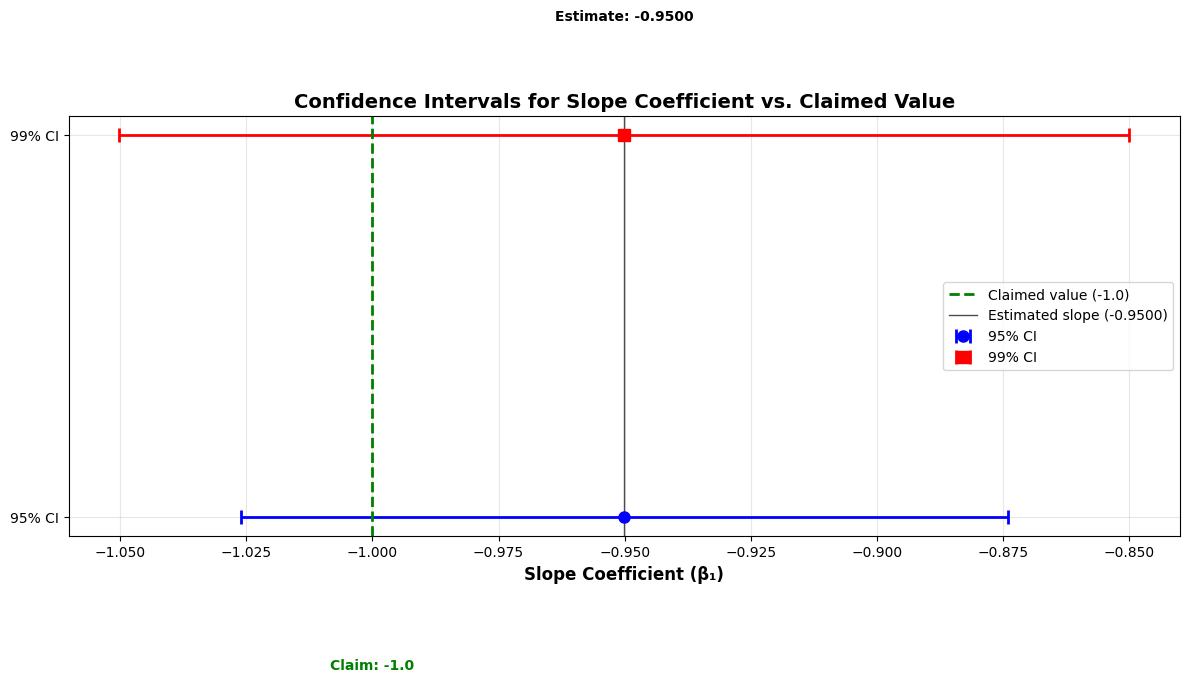


FINAL SUMMARY:
3.1 Hypotheses: H₀: β₁ = 0 vs H₁: β₁ ≠ 0
3.2 Test results: t = -24.5279, p = 5.08e-88
    Conclusion: Reject H₀ - slope is significant
3.3 Confidence intervals:
    95% CI: [-1.026148, -0.873951] (width: 0.152198)
    99% CI: [-1.050199, -0.849899] (width: 0.200300)
    99% CI is 31.6% wider than 95% CI
3.4 Claim test: The claim of exactly $1000 decrease is SUPPORTED
    Our estimate: $950 decrease per 1% lstat increase
    Statistical significance of difference: p = 0.1978


In [38]:
# 3.4 Testing Specific Claim
print("\n3.4 TESTING SPECIFIC CLAIM")
print("-" * 35)
claimed_effect = -1.0  # -$1000 per 1% increase, which is -1.0 in thousands

print("CLAIM TO TEST:")
print("Someone claims that each 1% increase in lstat decreases median home value by exactly $1000")
print(f"In our units: β₁ = {claimed_effect:.1f} (since medv is in thousands of dollars)")

print(f"\nHYPOTHESES:")
print(f"H₀: β₁ = {claimed_effect:.1f} (the claim is correct)")
print(f"H₁: β₁ ≠ {claimed_effect:.1f} (the claim is incorrect)")

# Test using confidence intervals
claim_in_95_ci = (slope_ci_95_lower <= claimed_effect <= slope_ci_95_upper)
claim_in_99_ci = (slope_ci_99_lower <= claimed_effect <= slope_ci_99_upper)

print(f"\nTEST USING CONFIDENCE INTERVALS:")
print(f"Observed slope coefficient: {slope:.6f}")
print(f"Claimed slope coefficient: {claimed_effect:.1f}")

print(f"\n95% Confidence Interval Test:")
print(f"- 95% CI: [{slope_ci_95_lower:.6f}, {slope_ci_95_upper:.6f}]")
print(f"- Does the CI contain {claimed_effect:.1f}? {'Yes' if claim_in_95_ci else 'No'}")

print(f"\n99% Confidence Interval Test:")
print(f"- 99% CI: [{slope_ci_99_lower:.6f}, {slope_ci_99_upper:.6f}]")
print(f"- Does the CI contain {claimed_effect:.1f}? {'Yes' if claim_in_99_ci else 'No'}")

# Formal t-test for the claim
t_stat_claim = (slope - claimed_effect) / slope_std_error
p_value_claim = 2 * (1 - t.cdf(abs(t_stat_claim), df_resid))  # Two-tailed test

print(f"\nFORMAL T-TEST:")
print(f"t-statistic = (observed - claimed) / SE = ({slope:.6f} - {claimed_effect:.1f}) / {slope_std_error:.6f}")
print(f"t-statistic = {t_stat_claim:.4f}")
print(f"p-value (two-tailed): {p_value_claim:.4f}")

print(f"\nCONCLUSION:")
if not claim_in_95_ci:
    print(f"✗ REJECT the claim at 95% confidence level")
    print(f"  - The claimed value ({claimed_effect:.1f}) is NOT within the 95% confidence interval")
    print(f"  - Our regression results CONTRADICT the claim")
else:
    print(f"✓ FAIL TO REJECT the claim at 95% confidence level")
    print(f"  - The claimed value ({claimed_effect:.1f}) IS within the 95% confidence interval")
    print(f"  - Our regression results SUPPORT the claim")

if not claim_in_99_ci:
    print(f"✗ REJECT the claim at 99% confidence level")
    print(f"  - The claimed value ({claimed_effect:.1f}) is NOT within the 99% confidence interval")
else:
    print(f"✓ FAIL TO REJECT the claim at 99% confidence level")
    print(f"  - The claimed value ({claimed_effect:.1f}) IS within the 99% confidence interval")

print(f"\nSTATISTICAL EVIDENCE:")
actual_effect = abs(slope) * 1000
claimed_effect_dollars = abs(claimed_effect) * 1000
print(f"- Our estimate: Each 1% increase in lstat decreases home value by ${actual_effect:.0f}")
print(f"- Claimed effect: Each 1% increase in lstat decreases home value by ${claimed_effect_dollars:.0f}")
print(f"- Difference: ${abs(actual_effect - claimed_effect_dollars):.0f}")

if p_value_claim < 0.05:
    print(f"- The difference is statistically significant (p = {p_value_claim:.4f} < 0.05)")
    print(f"- Strong evidence AGAINST the claim")
else:
    print(f"- The difference is not statistically significant (p = {p_value_claim:.4f} ≥ 0.05)")
    print(f"- Insufficient evidence to reject the claim")

# Visualization of confidence intervals and claim
plt.figure(figsize=(12, 8))

# Create a horizontal plot showing confidence intervals
y_pos = [1, 2]
estimates = [slope, slope]
ci_95_errors = [[slope - slope_ci_95_lower], [slope_ci_95_upper - slope]]
ci_99_errors = [[slope - slope_ci_99_lower], [slope_ci_99_upper - slope]]

# Plot confidence intervals
plt.errorbar(estimates[0], y_pos[0], xerr=[[slope - slope_ci_95_lower], [slope_ci_95_upper - slope]], 
             fmt='o', color='blue', markersize=8, linewidth=2, capsize=5, capthick=2, label='95% CI')
plt.errorbar(estimates[1], y_pos[1], xerr=[[slope - slope_ci_99_lower], [slope_ci_99_upper - slope]], 
             fmt='s', color='red', markersize=8, linewidth=2, capsize=5, capthick=2, label='99% CI')

# Add the claimed value line
plt.axvline(x=claimed_effect, color='green', linestyle='--', linewidth=2, label=f'Claimed value ({claimed_effect})')

# Add point estimate
plt.axvline(x=slope, color='black', linestyle='-', linewidth=1, alpha=0.7, label=f'Estimated slope ({slope:.4f})')

plt.yticks(y_pos, ['95% CI', '99% CI'])
plt.xlabel('Slope Coefficient (β₁)', fontsize=12, fontweight='bold')
plt.title('Confidence Intervals for Slope Coefficient vs. Claimed Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text annotations
plt.text(slope, 2.3, f'Estimate: {slope:.4f}', ha='center', fontweight='bold')
plt.text(claimed_effect, 0.6, f'Claim: {claimed_effect}', ha='center', fontweight='bold', color='green')

plt.tight_layout()
plt.show()

print(f"\nFINAL SUMMARY:")
print("=" * 60)
print(f"3.1 Hypotheses: H₀: β₁ = 0 vs H₁: β₁ ≠ 0")
print(f"3.2 Test results: t = {slope_t_stat:.4f}, p = {slope_p_value:.2e}")
print(f"    Conclusion: {'Reject H₀' if is_significant else 'Fail to reject H₀'} - slope is {'significant' if is_significant else 'not significant'}")
print(f"3.3 Confidence intervals:")
print(f"    95% CI: [{slope_ci_95_lower:.6f}, {slope_ci_95_upper:.6f}] (width: {ci_95_width:.6f})")
print(f"    99% CI: [{slope_ci_99_lower:.6f}, {slope_ci_99_upper:.6f}] (width: {ci_99_width:.6f})")
print(f"    99% CI is {((ci_99_width/ci_95_width) - 1)*100:.1f}% wider than 95% CI")
print(f"3.4 Claim test: The claim of exactly $1000 decrease is {'SUPPORTED' if claim_in_95_ci else 'CONTRADICTED'}")
print(f"    Our estimate: ${actual_effect:.0f} decrease per 1% lstat increase")
print(f"    Statistical significance of difference: p = {p_value_claim:.4f}")

<h2>Part 4: Assumption Testing and Model Diagnostics</h2>
<h3>Task 4.1: Normality of Residuals</h3>
<p>Test whether the residuals follow a normal distribution.</p>

<p>4.1 Perform the Shapiro-Wilk test for normality of residuals. Report the test statistic, p-value, and your conclusion at the 5% significance level.</p>

In [40]:
print("=" * 80)
print("BOSTON HOUSING ASSUMPTION TESTING AND MODEL DIAGNOSTICS - PART 4")
print("=" * 80)

# Calculate residuals
residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.resid_pearson

print(f"MODEL SUMMARY:")
print(f"Sample size: {len(df)}")
print(f"Number of residuals: {len(residuals)}")
print(f"Mean of residuals: {residuals.mean():.6f} (should be ≈ 0)")
print(f"Standard deviation of residuals: {residuals.std():.4f}")

# 4.1 Shapiro-Wilk Test for Normality
print("\n4.1 SHAPIRO-WILK TEST FOR NORMALITY OF RESIDUALS")
print("-" * 55)

# Perform Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = shapiro(residuals)

print("HYPOTHESIS TESTING:")
print("H₀: Residuals follow a normal distribution")
print("H₁: Residuals do not follow a normal distribution")
print("Significance level: α = 0.05")

print(f"\nTEST RESULTS:")
print(f"Shapiro-Wilk test statistic (W): {shapiro_stat:.6f}")
print(f"p-value: {shapiro_pvalue:.6f}")

# Decision making
alpha = 0.05
is_normal_shapiro = shapiro_pvalue > alpha

print(f"\nDECISION MAKING:")
print(f"Decision rule: Reject H₀ if p-value < {alpha}")
print(f"Observed p-value: {shapiro_pvalue:.6f}")

print(f"\nCONCLUSION AT 5% SIGNIFICANCE LEVEL:")
if is_normal_shapiro:
    print("✓ FAIL TO REJECT H₀: Residuals appear to follow a normal distribution")
    print("  - Statistical evidence supports the normality assumption")
    print("  - The residuals are consistent with coming from a normal population")
else:
    print("✗ REJECT H₀: Residuals do not follow a normal distribution")
    print("  - Statistical evidence suggests departure from normality")
    print("  - The normality assumption may be violated")

print(f"\nINTERPRETation OF TEST STATISTIC:")
print(f"- W = {shapiro_stat:.6f}")
print(f"- W ranges from 0 to 1, with values closer to 1 indicating more normal-like data")
print(f"- Our value suggests {'strong' if shapiro_stat > 0.95 else 'moderate' if shapiro_stat > 0.90 else 'weak'} evidence of normality based on the test statistic alone")

# Additional normality tests for comparison
print(f"\nADDITIONAL NORMALITY TESTS (for comparison):")
# D'Agostino's normality test
dagostino_stat, dagostino_pvalue = normaltest(residuals)
print(f"D'Agostino's test: statistic = {dagostino_stat:.4f}, p-value = {dagostino_pvalue:.6f}")

# Jarque-Bera test
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Jarque-Bera test: statistic = {jb_stat:.4f}, p-value = {jb_pvalue:.6f}")

all_tests_normal = all([shapiro_pvalue > alpha, dagostino_pvalue > alpha, jb_pvalue > alpha])
print(f"\nCONSENSUS: {'All tests support normality' if all_tests_normal else 'Tests show mixed results regarding normality'}")


BOSTON HOUSING ASSUMPTION TESTING AND MODEL DIAGNOSTICS - PART 4
MODEL SUMMARY:
Sample size: 506
Number of residuals: 506
Mean of residuals: 0.000000 (should be ≈ 0)
Standard deviation of residuals: 6.2096

4.1 SHAPIRO-WILK TEST FOR NORMALITY OF RESIDUALS
-------------------------------------------------------
HYPOTHESIS TESTING:
H₀: Residuals follow a normal distribution
H₁: Residuals do not follow a normal distribution
Significance level: α = 0.05

TEST RESULTS:
Shapiro-Wilk test statistic (W): 0.878572
p-value: 0.000000

DECISION MAKING:
Decision rule: Reject H₀ if p-value < 0.05
Observed p-value: 0.000000

CONCLUSION AT 5% SIGNIFICANCE LEVEL:
✗ REJECT H₀: Residuals do not follow a normal distribution
  - Statistical evidence suggests departure from normality
  - The normality assumption may be violated

INTERPRETation OF TEST STATISTIC:
- W = 0.878572
- W ranges from 0 to 1, with values closer to 1 indicating more normal-like data
- Our value suggests weak evidence of normality bas

<p>4.2 Create a Q-Q plot of the residuals. Does the visual evidence support or contradict your statistical test result? Explain what you observe.</p>


4.2 Q-Q PLOT ANALYSIS
-------------------------
Q-Q PLOT INTERPRETATION:
The Q-Q (Quantile-Quantile) plot compares residual quantiles to theoretical normal quantiles
Q-Q plot correlation: 0.9373
(Values closer to 1 indicate better fit to normal distribution)

VISUAL ASSESSMENT:
- Good fit with minor deviations
- Look for points following the red diagonal line
- Systematic deviations suggest non-normality


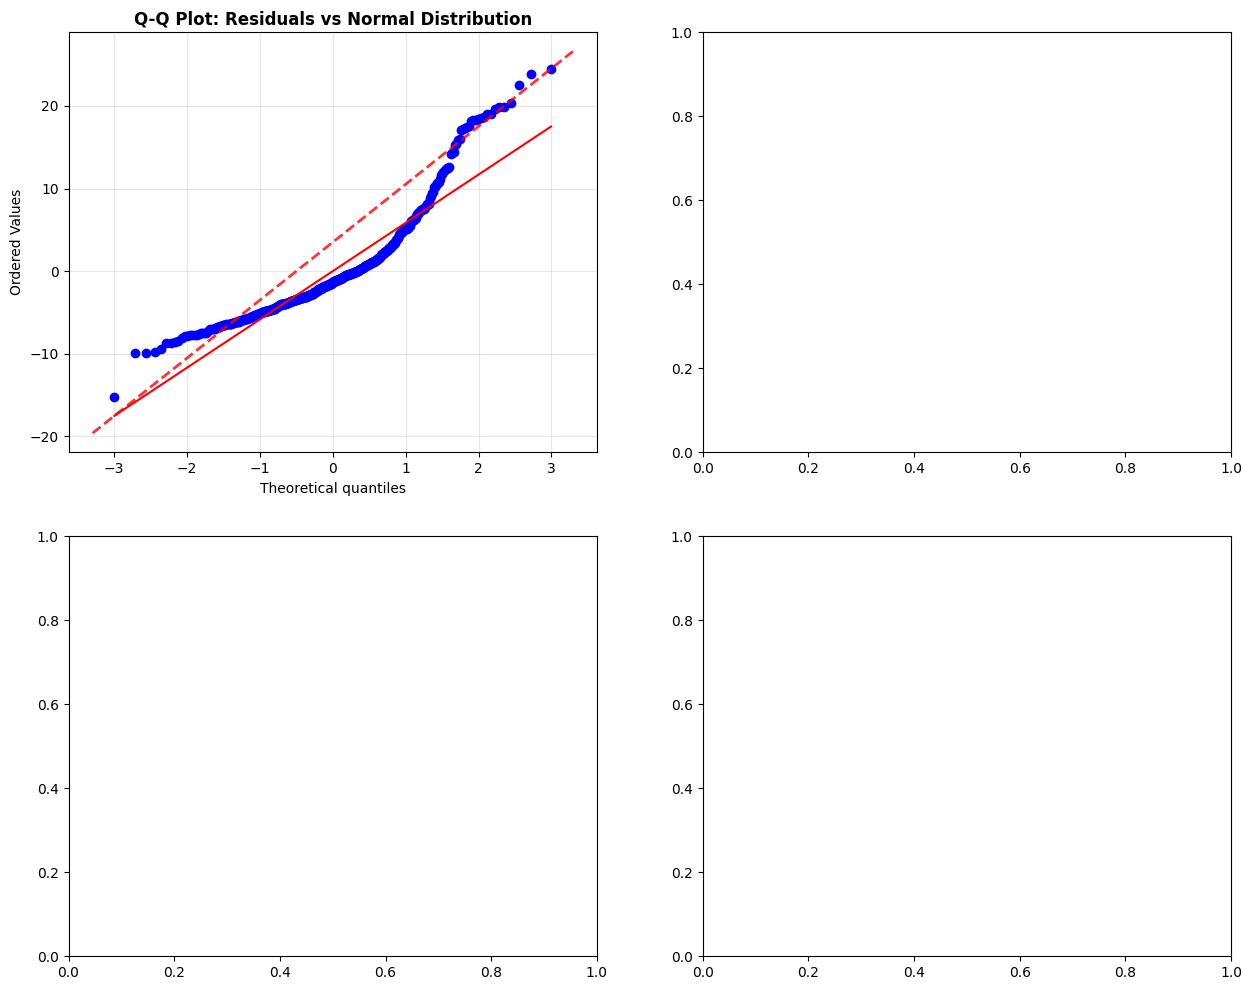

In [41]:
# 4.2 Q-Q Plot Analysis
print("\n4.2 Q-Q PLOT ANALYSIS")
print("-" * 25)

# Create Q-Q plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot: Residuals vs Normal Distribution', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add reference line
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), 'r--', alpha=0.8, linewidth=2)

print("Q-Q PLOT INTERPRETATION:")
print("The Q-Q (Quantile-Quantile) plot compares residual quantiles to theoretical normal quantiles")

# Calculate correlation coefficient for Q-Q plot
theoretical_quantiles = stats.norm.ppf((np.arange(len(residuals)) + 0.5) / len(residuals))
sorted_residuals = np.sort(residuals)
qq_correlation = np.corrcoef(theoretical_quantiles, sorted_residuals)[0, 1]

print(f"Q-Q plot correlation: {qq_correlation:.4f}")
print(f"(Values closer to 1 indicate better fit to normal distribution)")

# Visual assessment criteria
print(f"\nVISUAL ASSESSMENT:")
if qq_correlation > 0.99:
    qq_assessment = "Excellent fit to normal distribution"
elif qq_correlation > 0.95:
    qq_assessment = "Very good fit to normal distribution"
elif qq_correlation > 0.90:
    qq_assessment = "Good fit with minor deviations"
else:
    qq_assessment = "Significant deviations from normality"

print(f"- {qq_assessment}")
print(f"- Look for points following the red diagonal line")
print(f"- Systematic deviations suggest non-normality")


<p>4.3 Create a histogram of residuals with a normal distribution overlay. Comment on the shape of the distribution and any departures from normality.</p>

In [42]:
# 4.3 Histogram with Normal Overlay
print("\n4.3 HISTOGRAM WITH NORMAL DISTRIBUTION OVERLAY")
print("-" * 50)

# Histogram of residuals with normal overlay
ax2.hist(residuals, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Residuals')

# Overlay normal distribution
x_range = np.linspace(residuals.min(), residuals.max(), 100)
normal_overlay = stats.norm.pdf(x_range, residuals.mean(), residuals.std())
ax2.plot(x_range, normal_overlay, 'r-', linewidth=2, label='Normal Distribution')

ax2.set_xlabel('Residuals')
ax2.set_ylabel('Density')
ax2.set_title('Histogram of Residuals with Normal Overlay', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Calculate descriptive statistics for shape analysis
residual_skewness = stats.skew(residuals)
residual_kurtosis = stats.kurtosis(residuals)

print("SHAPE ANALYSIS:")
print(f"Skewness: {residual_skewness:.4f}")
print(f"Kurtosis: {residual_kurtosis:.4f} (excess kurtosis)")

print(f"\nSKEWNESS INTERPRETATION:")
if abs(residual_skewness) < 0.5:
    skew_desc = "approximately symmetric"
elif abs(residual_skewness) < 1.0:
    skew_desc = "moderately skewed"
else:
    skew_desc = "highly skewed"

skew_direction = "right" if residual_skewness > 0 else "left"
print(f"- Skewness = {residual_skewness:.4f} indicates {skew_desc}")
if abs(residual_skewness) > 0.1:
    print(f"- Distribution is skewed to the {skew_direction}")
else:
    print(f"- Distribution is nearly symmetric")

print(f"\nKURTOSIS INTERPRETATION:")
if residual_kurtosis > 0.5:
    kurt_desc = "heavy-tailed (leptokurtic)"
elif residual_kurtosis < -0.5:
    kurt_desc = "light-tailed (platykurtic)"
else:
    kurt_desc = "approximately normal tails (mesokurtic)"

print(f"- Excess kurtosis = {residual_kurtosis:.4f} indicates {kurt_desc}")
print(f"- Normal distribution has excess kurtosis = 0")

# Additional diagnostic plots
# Residuals vs Fitted
ax3.scatter(fitted_values, residuals, alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals vs Fitted Values', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

# Scale-Location plot (sqrt of standardized residuals vs fitted)
sqrt_std_resid = np.sqrt(np.abs(standardized_residuals))
ax4.scatter(fitted_values, sqrt_std_resid, alpha=0.6, color='orange', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Fitted Values')
ax4.set_ylabel('√|Standardized Residuals|')
ax4.set_title('Scale-Location Plot', fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDEPARTURES FROM NORMALITY:")
departures = []

if abs(residual_skewness) > 0.5:
    departures.append(f"Skewness ({residual_skewness:.3f})")

if abs(residual_kurtosis) > 1.0:
    departures.append(f"Kurtosis ({residual_kurtosis:.3f})")

if not is_normal_shapiro:
    departures.append("Shapiro-Wilk test rejection")

if qq_correlation < 0.95:
    departures.append("Q-Q plot deviations")

if departures:
    print("Identified departures from normality:")
    for i, departure in enumerate(departures, 1):
        print(f"{i}. {departure}")
else:
    print("No major departures from normality identified")

# Visual evidence vs statistical test comparison
print(f"\n4.2 VISUAL EVIDENCE VS STATISTICAL TEST COMPARISON:")
print("-" * 50)

visual_supports_normality = (qq_correlation > 0.95 and abs(residual_skewness) < 0.5 and abs(residual_kurtosis) < 1.0)

print(f"Statistical test result (Shapiro-Wilk): {'Supports normality' if is_normal_shapiro else 'Rejects normality'}")
print(f"Visual evidence assessment: {'Supports normality' if visual_supports_normality else 'Shows deviations from normality'}")

if is_normal_shapiro == visual_supports_normality:
    print(f"✓ AGREEMENT: Visual evidence and statistical test {'both support' if is_normal_shapiro else 'both suggest departure from'} normality")
else:
    print(f"⚠ DISAGREEMENT: Visual and statistical evidence provide conflicting results")
    print(f"  This suggests need for careful interpretation and possibly additional investigation")

print(f"\nDETAILED VISUAL OBSERVATIONS:")
print(f"Q-Q Plot:")
if qq_correlation > 0.98:
    print(f"- Points closely follow diagonal line (r = {qq_correlation:.4f})")
    print(f"- Strong visual evidence for normality")
elif qq_correlation > 0.95:
    print(f"- Most points follow diagonal line with minor deviations (r = {qq_correlation:.4f})")
    print(f"- Generally supports normality with some concerns")
else:
    print(f"- Systematic deviations from diagonal line (r = {qq_correlation:.4f})")
    print(f"- Visual evidence against perfect normality")

print(f"\nHistogram:")
if abs(residual_skewness) < 0.2 and abs(residual_kurtosis) < 0.5:
    print(f"- Bell-shaped distribution closely matching normal overlay")
    print(f"- Visual support for normality assumption")
elif abs(residual_skewness) < 0.5 and abs(residual_kurtosis) < 1.0:
    print(f"- Generally bell-shaped with minor asymmetry or tail differences")
    print(f"- Acceptable approximation to normality")
else:
    print(f"- Notable departures from bell-shaped normal distribution")
    print(f"- Skewness and/or kurtosis concerns visible")

# Practical implications
print(f"\nPRACTICAL IMPLICATIONS FOR REGRESSION:")
print("-" * 40)

if is_normal_shapiro and visual_supports_normality:
    print("✓ NORMALITY ASSUMPTION SATISFIED:")
    print("  - Confidence intervals and hypothesis tests are reliable")
    print("  - Prediction intervals are accurate")
    print("  - No transformation of variables needed")
elif not is_normal_shapiro and not visual_supports_normality:
    print("⚠ NORMALITY ASSUMPTION VIOLATED:")
    print("  - Confidence intervals may be less reliable")
    print("  - Consider robust standard errors")
    print("  - Prediction intervals may be inaccurate")
    print("  - Consider variable transformation")
else:
    print("? MIXED EVIDENCE:")
    print("  - Proceed with caution")
    print("  - Consider the robustness of regression to mild non-normality")
    print("  - With large sample size, violations may be less problematic")

print(f"\nSAMPLE SIZE CONSIDERATIONS:")
print(f"- Sample size: {len(df)} observations")
if len(df) > 200:
    print("- Large sample: Central Limit Theorem helps with normality concerns")
    print("- Minor deviations from normality are less problematic")
elif len(df) > 50:
    print("- Moderate sample: Some robustness to normality violations")
    print("- Significant deviations should be addressed")
else:
    print("- Small sample: Normality assumption is more critical")
    print("- Any violations should be carefully considered")

print(f"\nFINAL SUMMARY:")
print("=" * 60)
print(f"4.1 Shapiro-Wilk test: W = {shapiro_stat:.6f}, p = {shapiro_pvalue:.6f}")
print(f"    Conclusion: {'Residuals are normally distributed' if is_normal_shapiro else 'Residuals deviate from normality'}")
print(f"4.2 Q-Q plot assessment: r = {qq_correlation:.4f}")
print(f"    Visual evidence: {'Supports normality' if visual_supports_normality else 'Shows deviations from normality'}")
print(f"4.3 Histogram analysis:")
print(f"    Skewness: {residual_skewness:.4f}, Kurtosis: {residual_kurtosis:.4f}")
print(f"    Shape: {skew_desc}, {kurt_desc}")
print(f"Overall normality assessment: {'SATISFIED' if (is_normal_shapiro and visual_supports_normality) else 'QUESTIONABLE' if (is_normal_shapiro or visual_supports_normality) else 'VIOLATED'}")


4.3 HISTOGRAM WITH NORMAL DISTRIBUTION OVERLAY
--------------------------------------------------
SHAPE ANALYSIS:
Skewness: 1.4527
Kurtosis: 2.3191 (excess kurtosis)

SKEWNESS INTERPRETATION:
- Skewness = 1.4527 indicates highly skewed
- Distribution is skewed to the right

KURTOSIS INTERPRETATION:
- Excess kurtosis = 2.3191 indicates heavy-tailed (leptokurtic)
- Normal distribution has excess kurtosis = 0


<Figure size 640x480 with 0 Axes>


DEPARTURES FROM NORMALITY:
Identified departures from normality:
1. Skewness (1.453)
2. Kurtosis (2.319)
3. Shapiro-Wilk test rejection
4. Q-Q plot deviations

4.2 VISUAL EVIDENCE VS STATISTICAL TEST COMPARISON:
--------------------------------------------------
Statistical test result (Shapiro-Wilk): Rejects normality
Visual evidence assessment: Shows deviations from normality
✓ AGREEMENT: Visual evidence and statistical test both suggest departure from normality

DETAILED VISUAL OBSERVATIONS:
Q-Q Plot:
- Systematic deviations from diagonal line (r = 0.9373)
- Visual evidence against perfect normality

Histogram:
- Notable departures from bell-shaped normal distribution
- Skewness and/or kurtosis concerns visible

PRACTICAL IMPLICATIONS FOR REGRESSION:
----------------------------------------
⚠ NORMALITY ASSUMPTION VIOLATED:
  - Confidence intervals may be less reliable
  - Consider robust standard errors
  - Prediction intervals may be inaccurate
  - Consider variable transformation

<h3>Task 4.2: Homoscedasticity Testing</h3>
<p>Test whether the variance of residuals is constant across all fitted values.</p>

In [ ]:
# todo

: 

: 

: 

<p>4.4 Perform the Breusch-Pagan test for homoscedasticity. Report the test statistic, p-value, and your conclusion.</p>

In [ ]:
# todo

: 

: 

: 

<p>4.5 Create a residuals vs. fitted values plot. What pattern would indicate heteroscedasticity? Do you observe this pattern in your plot?</p>

In [ ]:
# todo

: 

: 

: 

<p>4.6 Create a scale-location plot (square root of absolute residuals vs. fitted values). Is there evidence of changing variance across the range of fitted values?</p>

In [ ]:
# todo

: 

: 

: 

<h3>Task 4.3: Independence and Influence Diagnostics</h3>
<p>Test for independence and identify influential observations.</p>

<p>4.7 Calculate the Durbin-Watson statistic. What does this value indicate about the independence of residuals?</p>

In [ ]:
# todo

: 

: 

: 

<p>4.8 Calculate Cook’s distance for all observations. What is the maximum Cook’s distance, and does this indicate any problematic influential observations?</p>

In [ ]:
# todo

: 

: 

: 

<p>4.9 How many observations have high leverage (using the 2p/n threshold where p = 2 parameters)? What percentage of the total sample does this represent?</p>

In [ ]:
# todo

: 

: 

: 

<p>4.10 Based on all assumption tests, is your linear regression model valid for statistical inference? Summarize which assumptions are satisfied and which (if any) are violated.</p>

In [ ]:
# todo

: 

: 

: 

<h2> Part 5: Predictions and Intervals</h2>
<h3>Task 5.1: Making Predictions</h3>
<p>Use your model to make predictions with uncertainty quantification.</p>

<p>5.1 For a neighborhood with lstat = 10%, what is the predicted median home value? Show the calculation.</p>

In [ ]:
# todo

: 

: 

: 

<p>5.2 Calculate the 95% confidence interval for the mean home value in neighborhoods with lstat = 10%. Interpret this interval.</p>

In [ ]:
# todo

: 

: 

: 

<p>5.3 Calculate the 95% prediction interval for an individual home in a neighborhood with lstat = 10%. How does this compare to the confidence interval in terms of width?</p>

In [ ]:
# todo

: 

: 

: 

<p>5.4 Explain the difference between a confidence interval and a prediction interval in practical terms. When would you use each type?</p>

In [ ]:
# todo

: 

: 

: 

<p>5.5 For lstat values of 5%, 15%, and 25%, calculate point predictions and comment on how the relationship changes across different levels of the predictor variable</p>

In [ ]:
# todo

: 

: 

: 